# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: William Blennow

Vem du har presenterat för: I gruppdiskussion under lektion

Datum då du presenterade: 2024/05/08

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation:
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [19]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


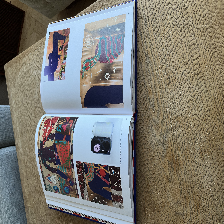

In [14]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
img_path = '/bok.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [ ]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [ ]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 [==============================] - 1s 1s/step
Predicted: [('n04409515', 'tennis_ball', 0.9999969), ('n04039381', 'racket', 2.7893084e-06), ('n03942813', 'ping-pong_ball', 5.5036548e-08)]


# 1. Take some pictures yourself and predict their class.

1/1 [==============================] - 0s 206ms/step


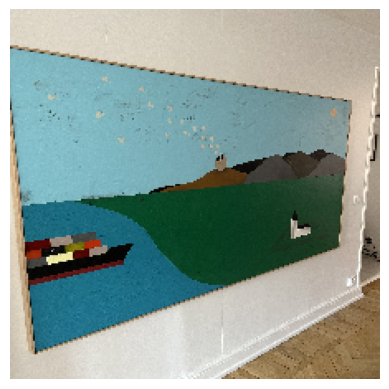

Predictions for /tavla.jpg : [('n04476259', 'tray', 0.22390305), ('n02840245', 'binder', 0.16881919), ('n03291819', 'envelope', 0.0733472)]
1/1 [==============================] - 0s 217ms/step


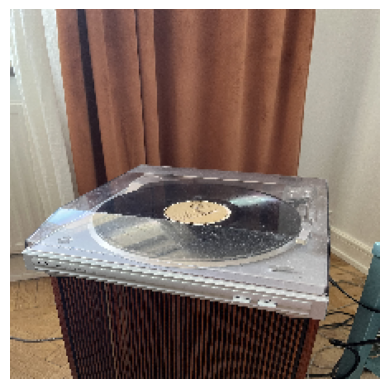

Predictions for /vinyl.jpg : [('n04040759', 'radiator', 0.38903224), ('n03482405', 'hamper', 0.32802567), ('n02747177', 'ashcan', 0.11127629)]
1/1 [==============================] - 0s 216ms/step


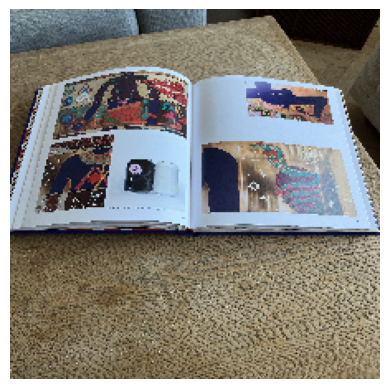

Predictions for /bok.jpg : [('n04476259', 'tray', 0.37793353), ('n02840245', 'binder', 0.21220821), ('n03598930', 'jigsaw_puzzle', 0.12963286)]
1/1 [==============================] - 0s 188ms/step


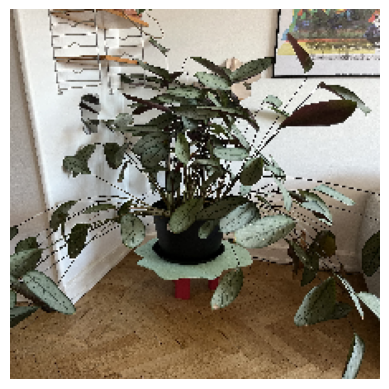

Predictions for /vaxt.jpg : [('n03991062', 'pot', 0.55898225), ('n03786901', 'mortar', 0.08907038), ('n03457902', 'greenhouse', 0.029405199)]


In [25]:
image_names = ["/tavla.jpg", "/vinyl.jpg", "/bok.jpg", "/vaxt.jpg"]

for img_name in image_names:
    img_path = img_name

    img = image.load_img(img_path, target_size=(224, 224))
    img = np.rot90(img, k=3)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)

    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print('Predictions for', img_name, ':', decode_predictions(preds, top=3)[0])

# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

Pretrained models låter oss använda redan tränade modeller på stora dataset istället för att vi ska behöva bygga våra egna från scratch.

Detta ger oss fördelar i tex transfer learning där vi kan ta en redan existerande modell för att sedan anpassa den till vårt syfte. Genom detta så sparar vi både tid och resurser, vi kan också anpassa dom utifrån den frågeställning som vi har.
